In [33]:
# Gain modulation RNN with oja learning on weight matrix
import numpy as np
import sys
sys.path.append("..")
from rnn_sin2 import RNN
import matplotlib.pyplot as plt
import json
import torch
import seaborn as sns

## Loading Trained Weights

In [34]:
with open('../weights/SIN2_bphebbpt_32_nodes/weight_history.json') as f:
    weight_history = json.load(f)

In [35]:
weight_history.keys()

dict_keys(['trained gain', 'trained shift', 'trained weights', 'connectivity matrix', 'input weights', 'output weights', 'losses', 'gain_changes', 'shift_changes', 'init_weight', 'init_activations'])

In [36]:
gains = np.array(weight_history['trained gain'])
shifts = np.array(weight_history['trained shift'])
weight_matrix = np.array(weight_history['trained weights'])
connectivity_matrix = np.array(weight_history['connectivity matrix'])
input_weight_matrix = np.array(weight_history['input weights'])
output_weight_matrix = np.array(weight_history['output weights'])
losses = np.array(weight_history['losses'])
gain_changes = np.array(weight_history['gain_changes'])
shift_changes = np.array(weight_history['shift_changes'])
init_weight_matrix = np.array(weight_history['init_weight'])
# weights = weight_history['weights']
init_activations = np.array(weight_history['init_activations'])

In [37]:
init_activations

array([[9.82489407e-01],
       [9.70077157e-01],
       [9.51643527e-01],
       [9.34686840e-01],
       [9.19778645e-01],
       [9.09274697e-01],
       [9.06087935e-01],
       [8.94630611e-01],
       [8.93437386e-01],
       [8.90083015e-01],
       [8.90771806e-01],
       [8.94244194e-01],
       [8.96132946e-01],
       [8.84970427e-01],
       [5.00771582e-01],
       [7.88719044e-05],
       [3.55537713e-01],
       [3.68240237e-01],
       [3.70745420e-01],
       [5.92727661e-01],
       [6.31954730e-01],
       [6.42625868e-01],
       [8.56246948e-01],
       [9.80659902e-01],
       [9.91407990e-01],
       [9.98248279e-01],
       [9.99039710e-01],
       [9.99303818e-01],
       [9.99448359e-01],
       [9.99540746e-01],
       [9.99589384e-01],
       [9.99635577e-01]])

In [38]:
output_weight_matrix

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]])

In [39]:
weight_matrix

array([[ 0.        ,  1.10017216,  1.10017216, ..., -1.02650499,
        -1.02650499, -1.02650499],
       [ 1.10017216,  0.        ,  1.10012269, ..., -1.02650499,
        -1.02650499, -1.02650499],
       [ 1.10017216,  1.10012269,  0.        , ..., -1.02640808,
        -1.02649224, -1.02650499],
       ...,
       [ 1.10017216,  1.10017216,  1.10012269, ...,  0.        ,
        -1.02650499, -1.02650499],
       [ 1.10017216,  1.10017216,  1.10017216, ..., -1.02650499,
         0.        , -1.02650499],
       [ 1.10017216,  1.10017216,  1.10017216, ..., -1.02650499,
        -1.02650499,  0.        ]])

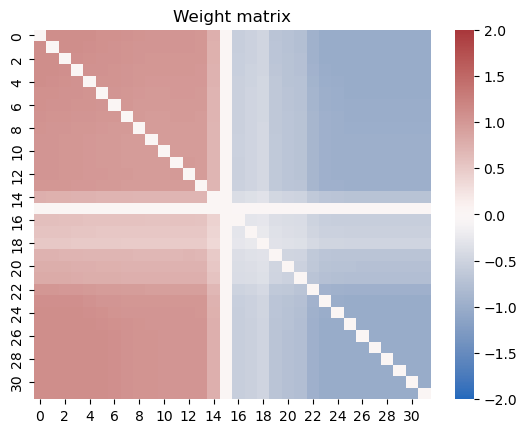

In [40]:
sns.heatmap(weight_matrix, vmax=2, vmin=-2, cmap='vlag')
plt.title('Weight matrix')
plt.savefig('fig/0122_SIN2_bphebbpt_weight_matrix.png')

## Defining Network

In [41]:
time_constant = 100 #ms
timestep = 10 #ms
ndata = 800
time = ndata * timestep #ms
num_inputs = 1
num_nodes = 32
# init_activations = np.zeros((num_nodes, 1))

100%|██████████| 800/800 [00:00<00:00, 19511.23it/s]


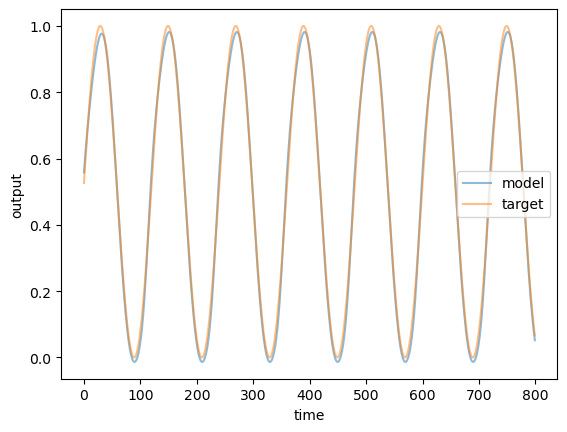

In [55]:
time_points = np.arange(ndata).reshape(-1, 1)
inputs = (1 + np.sin(time_points/60*np.pi))/2
targets = (1 + np.sin((time_points+1)/60*np.pi))/2
inputs = inputs.reshape(-1, 1)
targets = targets.reshape(-1, 1)

network = RNN(weight_matrix, connectivity_matrix, init_activations, gains, shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)
outputs, activations = network.simulate(time, torch.tensor(inputs).float())

fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
plt.plot(time_points, targets, alpha=0.5, label='target')
# plt.ylim([0,1])
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
# plt.savefig("fig/0122_SIN2_bphebbpt_output.png")

100%|██████████| 800/800 [00:00<00:00, 18330.15it/s]


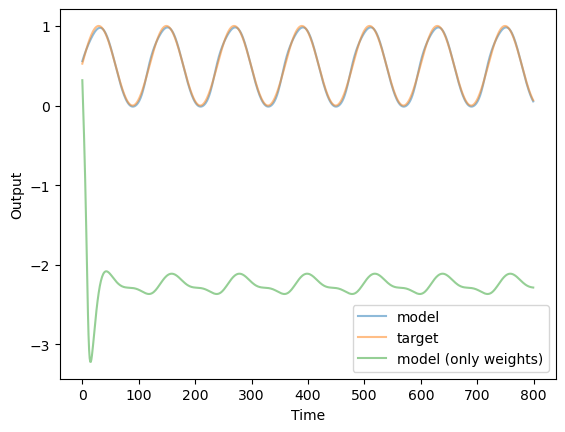

In [56]:
init_gains = np.ones((num_nodes, 1))
init_shifts = np.zeros((num_nodes, 1))
network = RNN(weight_matrix, connectivity_matrix, init_activations, init_gains, init_shifts, input_weight_matrix, output_weight_matrix, 
                time_constant = time_constant, timestep = timestep)
outputs_wt, activations_wt = network.simulate(time, torch.tensor(inputs).float())

fig, ax = plt.subplots()
plt.plot(time_points, outputs.detach().numpy(), alpha=0.5, label='model')
plt.plot(time_points, targets, alpha=0.5, label='target')
plt.plot(time_points, outputs_wt.detach().numpy(), alpha=0.5, label='model (only weights)')
plt.xlabel('Time')
plt.ylabel('Output')
plt.legend()
plt.savefig("fig/0122_SIN2_bphebbpt_output.png")

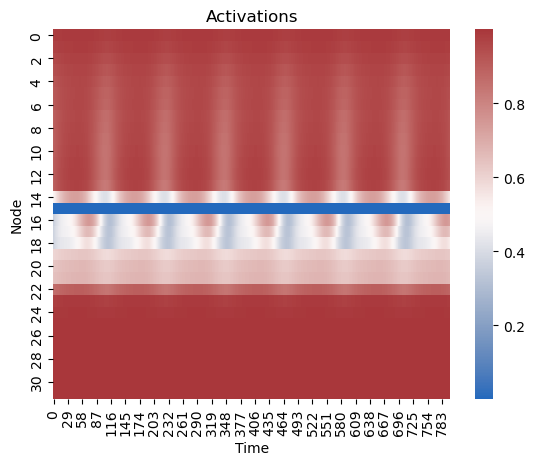

In [57]:
activations_t = activations.detach().numpy().T
sns.heatmap(activations_t, cmap='vlag')
plt.title('Activations')
plt.xlabel('Time')
plt.ylabel('Node')
plt.savefig('fig/0122_SIN2_bphebbpt_activations.png')

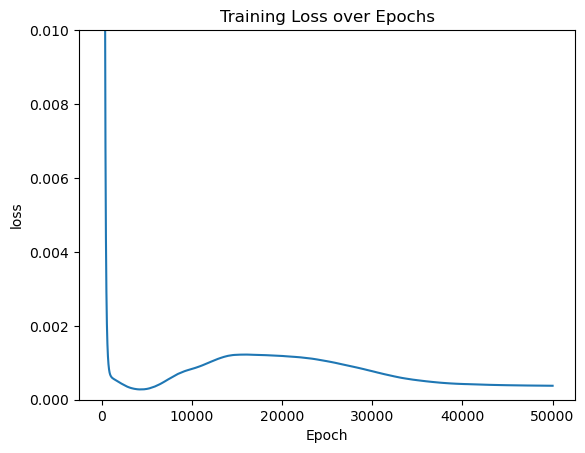

In [43]:
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.ylim([0,0.01])
plt.title("Training Loss over Epochs")
plt.savefig("fig/0122_SIN2_bphebbpt_loss.png")

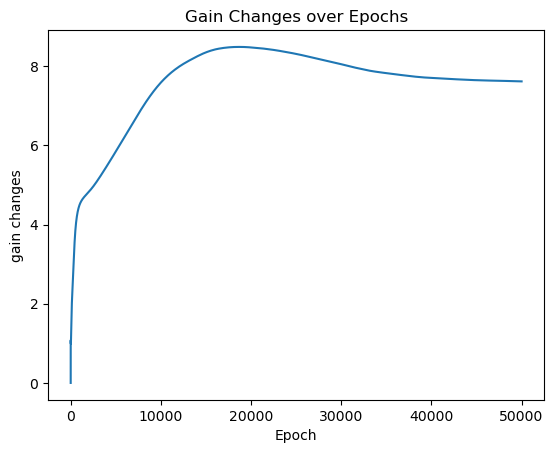

In [44]:
plt.plot(np.arange(len(gain_changes)), gain_changes)
plt.xlabel("Epoch")
plt.ylabel("gain changes")
# plt.ylim([0,0.5])
plt.title("Gain Changes over Epochs")
plt.savefig("fig/0122_SIN2_bphebbpt_gc.png")

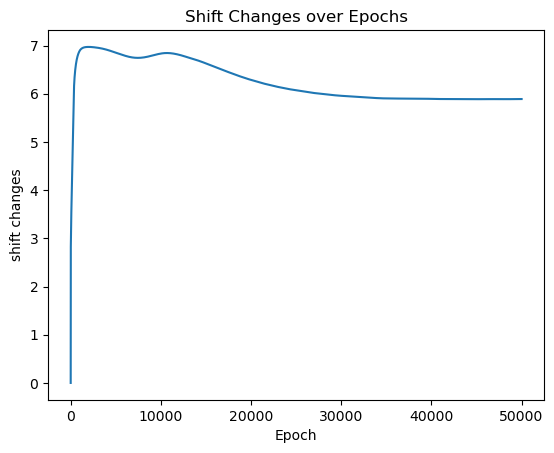

In [45]:
plt.plot(np.arange(len(shift_changes)), shift_changes)
plt.xlabel("Epoch")
plt.ylabel("shift changes")
# plt.ylim([0,0.5])
plt.title("Shift Changes over Epochs")
plt.savefig("fig/0122_SIN2_bphebbpt_sc.png")

In [46]:
# plt.plot(np.arange(len(weight_sums)), weight_sums)
# plt.xlabel("Epoch")
# plt.ylabel("weight sums")
# # plt.ylim([0,0.5])
# # plt.savefig("fig/sin_oja_weightsum.png")